# Curvas de Aprendizado

In [3]:
from aurelio.plotter import collect, collect_zip
import os
import pandas as pd
import seaborn as sns

In [4]:
exps = [
    "with_elmo-n:n-glove_100",
    "with_elmo-n:1-glove_100",
    "with_elmo-1:n-glove_100",
    "with_elmo-1:1-glove_100",
    "with_elmo-n:n-glove_0",
    "no_elmo-n:n-glove_0",
    "no_elmo-n:n-glove_100"
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "{}/metrics/{}".format(os.getcwd(), exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        dfs[exp] = pd.DataFrame.from_records(collect_zip(exp, exp))
#dfs["metrics_kfold_dev_reduced_elmo.zip"].head()

In [103]:
def plot_perc(dfs, names, metric):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(x="perc", y=metric, data=dfs, hue="name")
    
def plot_perc_f1_em(df):
    df = df[["perc", "best_validation_f1", "best_validation_em"]]
    df = pd.melt(df, id_vars=["perc"], 
                  var_name="score_type", value_name="score")
    
    df["score_type"] = ["F1" if type == "best_validation_f1" else "EM" for type in df["score_type"]]
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(data=df, x="perc", y="score", hue="score_type")



## Melhor Modelo

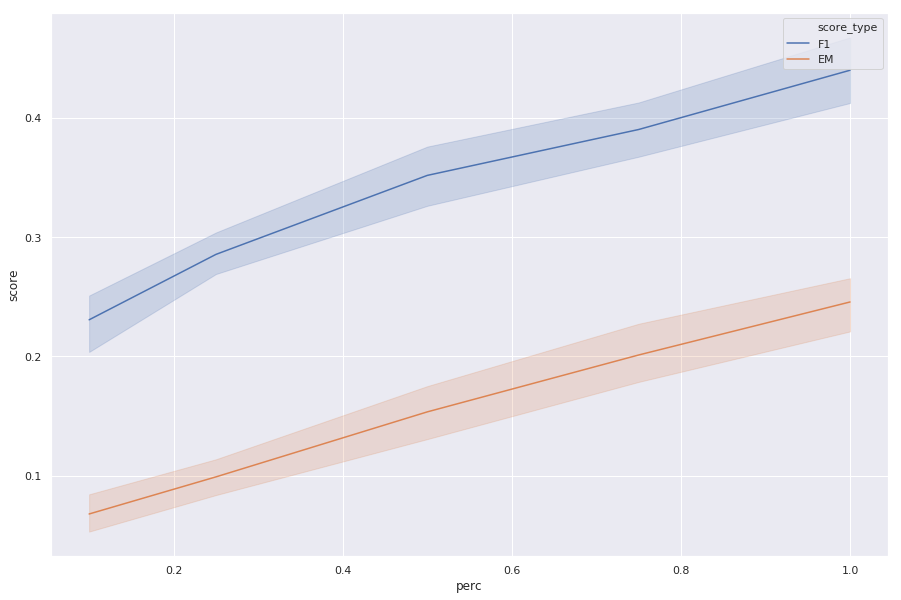

In [104]:
plot_perc_f1_em(dfs["with_elmo-n:n-glove_0"])

## Respostas Únicas e Múltiplas para Treino e Dev

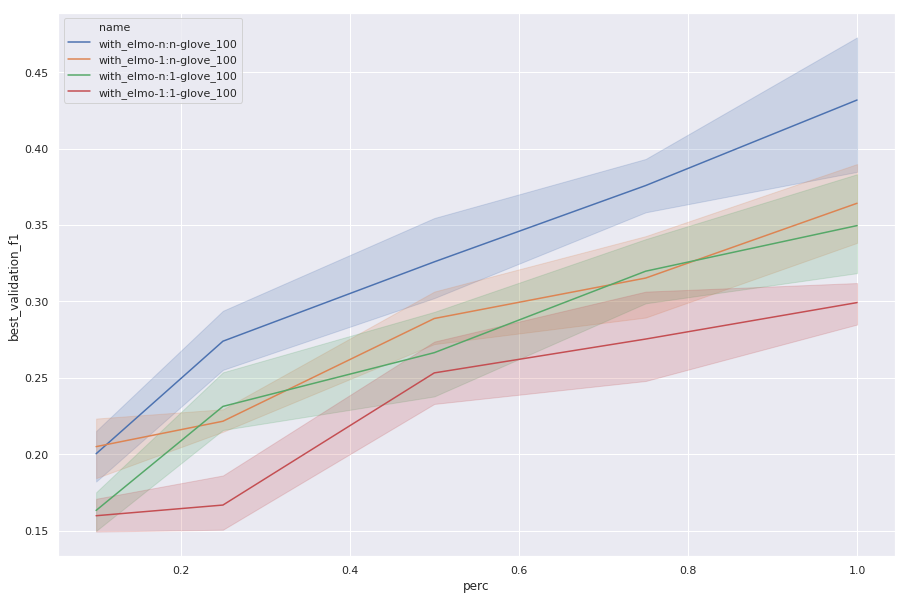

In [6]:
plot_perc(dfs, ["with_elmo-n:n-glove_100", "with_elmo-1:n-glove_100", "with_elmo-n:1-glove_100", "with_elmo-1:1-glove_100"], "best_validation_f1")

## GloVE + ELMo vs ELMO vs GloVE vs Random

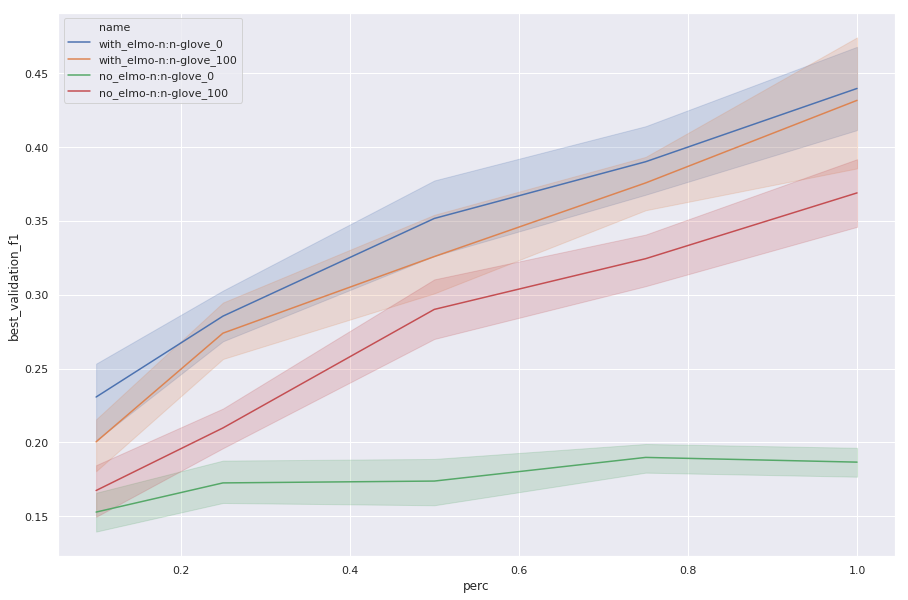

In [9]:
plot_perc(dfs, ["with_elmo-n:n-glove_0", "with_elmo-n:n-glove_100", "no_elmo-n:n-glove_0", "no_elmo-n:n-glove_100"], "best_validation_f1")

## F1 e EM dos modelos com 100% dos dados

In [62]:
df = pd.DataFrame({
    "ELMo": ["yes", "yes", "yes", "yes", "yes", "no", "no"],
    "GloVe": ["yes", "yes", "yes", "yes", "no", "no", "yes"],
    "Train Answers Amount": ["n", "n", "1", "1", "n", "n", "n"],
    "Dev Answers Amount": ["n", "1", "n", "1", "n", "n", "n"],
    "F1": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).mean()
    ],
    "EM": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
            dfs["no_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).mean()
    ]
}).sort_values(["F1", "EM"], ascending=False)\
    .style\
    .set_properties(**{'text-align': 'center'})\
    .hide_index()

df

ELMo,GloVe,Train Answers Amount,Dev Answers Amount,F1,EM
yes,no,n,n,0.439843,0.245608
yes,yes,n,n,0.431768,0.241338
no,yes,n,n,0.369034,0.176741
yes,yes,1,n,0.364206,0.174485
yes,yes,n,1,0.349592,0.161162
yes,yes,1,1,0.29921,0.125485
no,no,n,n,0.18653,0.0355728
